# Word2Vec

In [1]:
!pip install gensim

In [2]:
import gensim
gensim.__version__

'4.3.3'

In [3]:
!pip install nltk==3.8.1

## 영어 데이터 다운로드 및 전처리

In [4]:
import re
from lxml import etree
import urllib.request
import zipfile
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eunchankim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Word2Vec을 학습하기 위해서 데이터를 다운로드합니다.

In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x15fdd43d0>)

In [7]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

현재 영어 텍스트가 content_text에 저장되어져 있습니다. 이에 대해서 NLTK의 sent_tokenize를 통해서 문장을 구분해봅시다.

In [8]:
len(content_text)

24062319

In [9]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

In [10]:
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

총 문장의 개수는 273,424개입니다.

In [11]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [12]:
for line in result[:3]: # 샘플 3개만 출력
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


result => 이중 리스트

[[a], [b], [c]]

## 영어 Word2Vec 훈련시키기

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.  

vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram.  

코사인 유사도라는 것을 유사도 메트릭으로 사용. 값의 범위가 -1 ~ 1

In [14]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8299980163574219), ('guy', 0.8082960247993469), ('lady', 0.7643398642539978), ('boy', 0.7504379749298096), ('girl', 0.7487825751304626), ('gentleman', 0.7403379082679749), ('soldier', 0.7168755531311035), ('kid', 0.7006153464317322), ('poet', 0.6859949231147766), ('photographer', 0.6568329334259033)]


In [15]:
model.wv["man"]

array([ 6.60381019e-01, -2.22306609e+00, -7.14736953e-02, -5.76417558e-02,
        2.39875388e+00, -2.08272383e-01,  7.52768636e-01,  6.14355028e-01,
        1.95070401e-01,  2.69881308e-01, -6.99985862e-01,  4.06459659e-01,
        4.69339527e-02,  9.94574904e-01,  1.15065467e+00, -5.14313638e-01,
        4.16771352e-01, -6.92183375e-01,  1.10951006e+00, -1.71433163e+00,
        3.45623851e-01, -2.63941148e-03, -7.39785016e-01, -2.48941764e-01,
        1.17984362e-01, -4.45536494e-01, -2.83263636e+00,  1.05525516e-01,
       -1.46581817e+00, -1.06703353e+00,  5.96998990e-01,  4.41066548e-02,
        4.59816694e-01,  2.83749938e-01, -1.72186279e+00,  9.93667990e-02,
       -2.22347006e-01, -3.43527019e-01, -1.66378415e+00, -5.24737239e-01,
        6.90430403e-01, -6.45330906e-01, -7.07007125e-02,  1.24815118e+00,
        2.18125954e-01,  7.93719411e-01,  2.60361955e-02, -1.37908280e+00,
       -9.66133416e-01, -7.22339928e-01, -1.43664443e+00, -1.60585523e+00,
       -1.01059385e-01,  

In [16]:
len(model.wv["man"])

100

In [17]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [18]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8299980163574219), ('guy', 0.8082960247993469), ('lady', 0.7643398642539978), ('boy', 0.7504379749298096), ('girl', 0.7487825751304626), ('gentleman', 0.7403379082679749), ('soldier', 0.7168755531311035), ('kid', 0.7006153464317322), ('poet', 0.6859949231147766), ('photographer', 0.6568329334259033)]


In [19]:
model.wv.vectors.shape

(21613, 100)

In [20]:
# 현재 경로
%pwd

'/Users/eunchankim/Workspace/timwork/study'

In [23]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2025-01-16 09:40:55,108 - word2vec2tensor - INFO - running /opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2025-01-16 09:40:55,108 - keyedvectors - INFO - loading projection weights from eng_w2v
2025-01-16 09:40:55,583 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-01-16T09:40:55.571825', 'gensim': '4.3.3', 'python': '3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]', 'platform': 'macOS-14.7.2-arm64-arm-64bit', 'event': 'load_word2vec_format'}
2025-01-16 09:40:56,080 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2025-01-16 09:40:56,080 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2025-01-16 09:40:56,081 - word2vec2tensor - INFO - finished running word2vec2tensor.py


링크 : https://projector.tensorflow.org/  
위에 있는 Choose file 버튼을 누르고 eng_w2v_tensor.tsv 파일을 업로드하고, 아래에 있는 Choose file 버튼을 누르고 eng_w2v_metadata.tsv 파일을 업로드합니다. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화됩니다.

# FastText

## Word2Vec의 OOV 문제 확인해보기

OOV 문제(Out-Of-Vocabulary Problem) : Vocabulary에 존재하지 않는 단어가 등장하는 문제

In [24]:
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # Word2Vec 모델 로드

In [25]:
model_result = loaded_model.most_similar("overacting")
print(model_result)

KeyError: "Key 'overacting' not present in vocabulary"

In [ ]:
model_result = loaded_model.most_similar("memory")
print(model_result)

[('imagination', 0.6987040638923645), ('perception', 0.6984149813652039), ('reputation', 0.673920750617981), ('vision', 0.6715447902679443), ('consciousness', 0.6642743349075317), ('body', 0.6496174931526184), ('brain', 0.6496058106422424), ('reflection', 0.6454155445098877), ('logic', 0.6384631395339966), ('function', 0.6273216605186462)]


In [ ]:
model_result = loaded_model.most_similar("memorry")
print(model_result)

KeyError: ignored

In [ ]:
model_result = loaded_model.most_similar("electrofishing")
print(model_result)

KeyError: ignored

## FastText로 같은 단어에 대해서 테스트해보기

In [ ]:
from gensim.models import FastText
fasttext_model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
fasttext_model.wv.most_similar('overacting')

[('subtracting', 0.888767659664154),
 ('distracting', 0.8780357241630554),
 ('contracting', 0.8739362359046936),
 ('interacting', 0.86323082447052),
 ('overarching', 0.8603273630142212),
 ('manipulating', 0.8522518277168274),
 ('extracting', 0.8477192521095276),
 ('impacting', 0.8462916612625122),
 ('overeating', 0.8406209349632263),
 ('dissecting', 0.836780309677124)]

In [ ]:
fasttext_model.wv.most_similar('memorry')

[('memo', 0.8252053260803223),
 ('forgery', 0.7877283692359924),
 ('nemo', 0.7820053100585938),
 ('memoir', 0.7686251401901245),
 ('rehearsal', 0.7566522359848022),
 ('forgot', 0.7529147863388062),
 ('utero', 0.7459688186645508),
 ('memorize', 0.7429377436637878),
 ('rehearse', 0.7407183647155762),
 ('emory', 0.7380470037460327)]

In [ ]:
fasttext_model.wv.most_similar("electrofishing")

[('electrolyte', 0.861903965473175),
 ('electrolux', 0.8607944846153259),
 ('electro', 0.8512719869613647),
 ('electroshock', 0.8457664847373962),
 ('electroencephalogram', 0.8450732827186584),
 ('airbag', 0.8301453590393066),
 ('electrogram', 0.829261839389801),
 ('airbus', 0.82756507396698),
 ('electrochemical', 0.8266757130622864),
 ('electric', 0.8224183917045593)]

# PCA 시각화 해보기

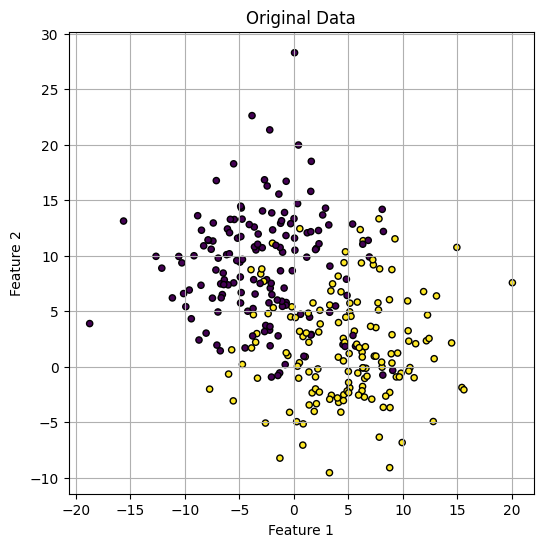

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 1. 데이터 생성
# 두 개의 클러스터가 있는 2D 데이터 생성
X, y = make_blobs(n_samples=300, centers=2, cluster_std=5.0, random_state=42)

# 데이터 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


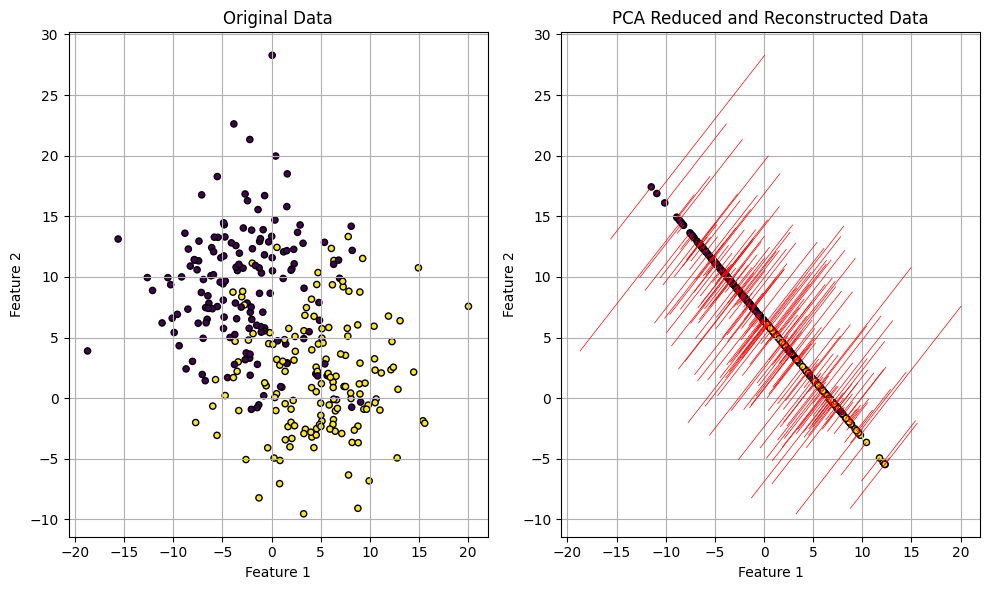

Explained Variance Ratio: [0.68037443]
Principal Components:
[[-0.72043405  0.69352345]]


In [3]:
# 2. PCA 적용
pca = PCA(n_components=1)  # 차원을 1D로 축소
X_pca = pca.fit_transform(X)  # PCA 변환 수행

# 3. PCA 결과 복원 (1D -> 2D)
X_reconstructed = pca.inverse_transform(X_pca)

# 4. 결과 시각화
# 원본 데이터와 PCA로 축소한 결과 비교
plt.figure(figsize=(10, 6))

# 원본 데이터
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# PCA 축소 및 복원 데이터
plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
for i in range(len(X)):
    plt.plot([X[i, 0], X_reconstructed[i, 0]], [X[i, 1], X_reconstructed[i, 1]], 'r-', lw=0.5)
plt.title("PCA Reduced and Reconstructed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. PCA 주성분 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:")
print(pca.components_)